In [ ]:
#Import delle librerie necessarie per il progetto
import pandas as pd 
import networkx.algorithms as nxa 
import collections
import networkx as nx
import matplotlib.pyplot as plt
import re 
import itertools
import statistics
import numpy as np

from wordcloud import WordCloud 
from collections import Counter
from textblob import TextBlob

#Libreria per interfacciarsi con di Twitter 
import tweepy 
from tweepy import OAuthHandler

#Libreria per eliminare le stopwords
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("italian")) 
new_stopwords = ["pi", "più","sar","de"]
second_stopwrds = set(stopwords.words("english")) 
stop_words = stop_words.union(new_stopwords)
stop_words = stop_words.union(second_stopwrds)
from nltk import bigrams

#Funzione che ci consente di eliminare dai tweets dei caratteri definiti e sostituirli con uno spazio
def remove_url(txt):    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#installazione della libreria che si occupa della sentiment e della emotion analysis
!pip install feel_it
from feel_it import EmotionClassifier, SentimentClassifier

#Dati necessari per l'uso delle api di Twitter
consumer_key = '4EfIh3vwLndcm1mcVKFmCvC0f'
consumer_secret = 'ox5PJzfyyckq6cyczTGL1fksQD46dyHxrkYi4Vrml6v6t7s89p'
access_token = '3751804937-qtMgYjDkwY5YNkDe6xiQbLJgLnuJDtBRC69uSCv'
access_secret = '61loUkJEU4y3fDvOAEbrogh8e5DwxCKvrkiodxRSP7sVb'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
#funzione che data una tabella cntenente i tweets in cui è menzionato un dato politico esegue la percentuale del numero di tweets con sentimenti positivi-negativi & con le 4 emozioni prese in considerazione
#stampando il tutto su un grafico a torta
def sentiment_emotion(table,name):
  app_1=table[table.Emotion=="fear"]
  app_1=app_1["Testo"]
  fear=round((app_1.shape[0]/table.shape[0])*100,1)
  app_2=table[table.Emotion=="joy"]
  app_2=app_2["Testo"]
  joy=round((app_2.shape[0]/table.shape[0])*100,1)
  app_3=table[table.Emotion=="anger"]
  app_3=app_3["Testo"]
  anger=round((app_3.shape[0]/table.shape[0])*100,1)
  app_4=table[table.Emotion=="sadness"]
  app_4=app_4["Testo"]
  sadness=round((app_4.shape[0]/table.shape[0])*100,1)
  app_5=table[table.Sentiment=="positive"]
  app_5=app_5["Testo"]
  positive=round((app_5.shape[0]/table.shape[0])*100,1)
  app_6=table[table.Sentiment=="neutral"]
  app_6=app_6["Testo"]
  neutral=round((app_6.shape[0]/table.shape[0])*100,1)
  app_7=table[table.Sentiment=="negative"]
  app_7=app_7["Testo"]
  negative=round((app_7.shape[0]/table.shape[0])*100,1)
  labels = ["Paura ["+str(fear)+"%]" , "Gioia ["+str(joy)+"%]","Rabbia ["+str(anger)+"%]","Tristezza ["+str(sadness)+"%]"]
  sizes = [fear, joy,anger, sadness]
  colors = ["green", "yellow","red","blue"]
  patches, texts = plt.pie(sizes,colors=colors, startangle=90)
  plt.style.use("default")
  plt.legend(labels)
  plt.title("Emotion Analysis " +str(name)+ " in percentuale")
  plt.axis("equal")
  plt.show()
  labels = ["Positivi ["+str(positive)+"%]" , "Neutrali ["+str(neutral)+"%]","Negativi ["+str(negative)+"%]"]
  sizes = [positive, neutral, negative]
  colors = ["green", "yellow","red"]
  patches, texts = plt.pie(sizes,colors=colors, startangle=90)
  plt.style.use("default")
  plt.legend(labels)
  plt.title("Sentiment Analysis "+str(name)+" in percentuale")
  plt.axis("equal")
  plt.show()

In [3]:
#funzione che data una tabella contenente i tweets in cui è menzionato un dato politico esegue il conteggio dei singoli tweets con sentimenti positivi-negativi & con le 4 emozioni prese in considerazione
#stampando il tutto su un grafico a barre orizzontali per poterle confrontare
def grafici_num(table,name):
  plt.figure(figsize=(8,6))
  table["Sentiment"].value_counts()
  table["Sentiment"].value_counts().plot(kind="barh")
  plt.title("Numero di Positivi, Negativi e Neutri riferiti a " +str(name))
  plt.show()
  plt.figure(figsize=(8,6))
  table["Emotion"].value_counts()
  table["Emotion"].value_counts().plot(kind="barh")
  plt.title("Numero di tweets arrabbiati, felici, tristi e impauriti riferiti a " +str(name))
  plt.show()

In [4]:
#Limite massimo di tweets da prendere per singolo esponente politico
num_max_tweets=1000

#Dichiarazioni delle liste che conterranno il contenuto dei tweet, la data e il numero di likes
testo=[]
nlike=[]
day=[]
rtc=[]
twn=[]

#Lista dei politici analizzati
list_polit=["GiorgiaMeloni","matteosalvinimi","luigidimaio","GiuseppeConteIT","EnricoLetta"]

#Dichiarazione di parte delle variabili utilizzate nel progetto
like_tot=[]
retweets_tot=[]
user_base=[]
perc_user_like=[]
perc_user_ret=[]
appoggio=[]
appoggio3=[]
like_activity=[]
re_activity=[]

tweet_meloni=[]
meloni_norm=[]
lista_meloni=[]
token_meloni=[]
contatore_parole_meloni=[]
appoggio_meloni=[]

tweet_salvini=[]
salvini_norm=[]
lista_salvini=[]
token_salvini=[]
contatore_parole_salvini=[]
appoggio_salvini=[]

tweet_dimaio=[]
dimaio_norm=[]
lista_dimaio=[]
token_dimaio=[]
contatore_parole_dimaio=[]
appoggio_dimaio=[]

tweet_conte=[]
conte_norm=[]
lista_conte=[]
token_conte=[]
contatore_parole_conte=[]
appoggio_conte=[]

tweet_letta=[]
letta_norm=[]
lista_letta=[]
token_letta=[]
contatore_parole_letta=[]
appoggio_letta=[]

char_letta=0
char_meloni=0
char_salvini=0
char_dimaio=0
char_conte=0
tot_nu=0

In [ ]:
#Blocco per collezionare i dati da Twitter. Per ogni politico vengono scaricati X Tweets con relativo ID, testo, numero di likes, numero di Retweets e la data di post.
#Questi vengono poi collocati tramite l'append nelle singole variabili
for j in range(len(list_polit)):
  for i in tweepy.Cursor(api.user_timeline, id=list_polit[j], tweet_mode="extended").items(num_max_tweets):
    if "RT @" not in i.full_text: #Vengono presi i contenuti privi della scritta RT @, eliminando così i retweets
      testo.append(i.full_text)
      nlike.append(i.favorite_count)
      day.append(i.created_at)
      rtc.append(i.retweet_count)
      twn.append(i.user.screen_name)

In [ ]:
#Blocco per la creazione di un dataframe (tabella) usando la libreria Panda
tabella=pd.DataFrame({"ID":twn,"Tweet":testo,"Likes":nlike,"Retweet":rtc,"Data":day})
tabella

,ID,Tweet,Likes,Retweet,Data
0,GiorgiaMeloni,"Alessandro, studente fuorisede di infermierist...",321,37,2021-11-07 19:02:46
1,GiorgiaMeloni,Le nostre proposte sono a disposizione da semp...,223,38,2021-11-07 14:18:33
2,GiorgiaMeloni,"Dopo un anno, con l'86% della popolazione vacc...",900,229,2021-11-07 14:18:31
3,GiorgiaMeloni,Dice bene il direttore Sallusti. È necessario ...,898,140,2021-11-07 10:27:38
4,GiorgiaMeloni,Una situazione che sta creando aumenti a casca...,275,45,2021-11-05 16:01:20
...,...,...,...,...,...
3593,EnricoLetta,Complimenti a @nzingaretti e alla Regione Lazi...,332,30,2021-06-27 10:45:39
3594,EnricoLetta,Bravissimi tutti. Bella 🇮🇹. Ma il migliore è R...,1019,62,2021-06-26 21:34:18
3595,EnricoLetta,"A #Berlino ho detto che o si sta con #Orban, o...",1092,101,2021-06-26 11:16:00
3596,EnricoLetta,Tra poco da #Berlino in diretta su @SkyTG24,65,8,2021-06-26 09:23:57


In [ ]:
#Usando le funzioni di Pandas si richiama a schermo una tabella con la media dei likes e dei retweet 
media_like_rt=tabella.groupby("ID").mean()
media_like_rt

,Likes,Retweet
ID,,
EnricoLetta,715.400510,76.849490
GiorgiaMeloni,1188.263789,205.930456
GiuseppeConteIT,3526.774763,509.533243
luigidimaio,559.171073,110.289269
matteosalvinimi,727.327621,114.220766


In [ ]:
#Usando le funzioni di Pandas si richiama a schermo una tabella con la mediana dei likes e dei retweet 
mediana_like_rt=tabella.groupby("ID").median()
mediana_like_rt

,Likes,Retweet
ID,,
EnricoLetta,269.0,34.0
GiorgiaMeloni,996.5,164.0
GiuseppeConteIT,1731.0,278.0
luigidimaio,436.0,81.0
matteosalvinimi,520.0,71.5


In [ ]:
#Trasferimento dei dati presenti nella precedente tabella delle medie in variabili appoggio così da poter creare un grafico
tab_likes_letta = media_like_rt.values[0][0]
tab_likes_meloni = media_like_rt.values[1][0]
tab_likes_conte = media_like_rt.values[2][0]
tab_likes_maio = media_like_rt.values[3][0]
tab_likes_salvini =  media_like_rt.values[4][0]
tab_rt_letta = media_like_rt.values[0][1]
tab_rt_meloni = media_like_rt.values[1][1]
tab_rt_conte = media_like_rt.values[2][1]
tab_rt_maio = media_like_rt.values[3][1]
tab_rt_salvini =  media_like_rt.values[4][1]

In [ ]:
#Trasferimento dei dati presenti nella precedente tabella della mediana in variabili appoggio così da poter creare un grafico
tab1_likes_letta = mediana_like_rt.values[0][0]
tab1_likes_meloni = mediana_like_rt.values[1][0]
tab1_likes_conte = mediana_like_rt.values[2][0]
tab1_likes_maio = mediana_like_rt.values[3][0]
tab1_likes_salvini =  mediana_like_rt.values[4][0]
tab1_rt_letta = mediana_like_rt.values[0][1]
tab1_rt_meloni = mediana_like_rt.values[1][1]
tab1_rt_conte = mediana_like_rt.values[2][1]
tab1_rt_maio = mediana_like_rt.values[3][1]
tab1_rt_salvini = mediana_like_rt.values[4][1]

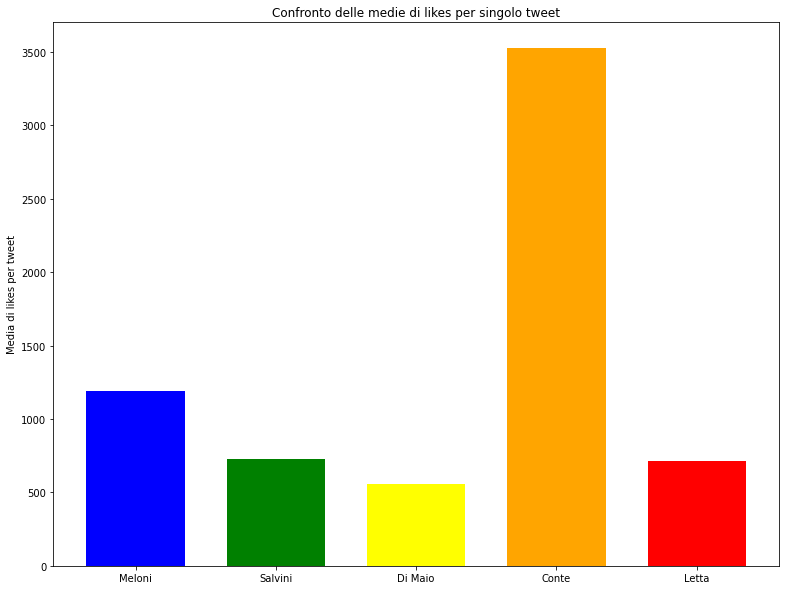

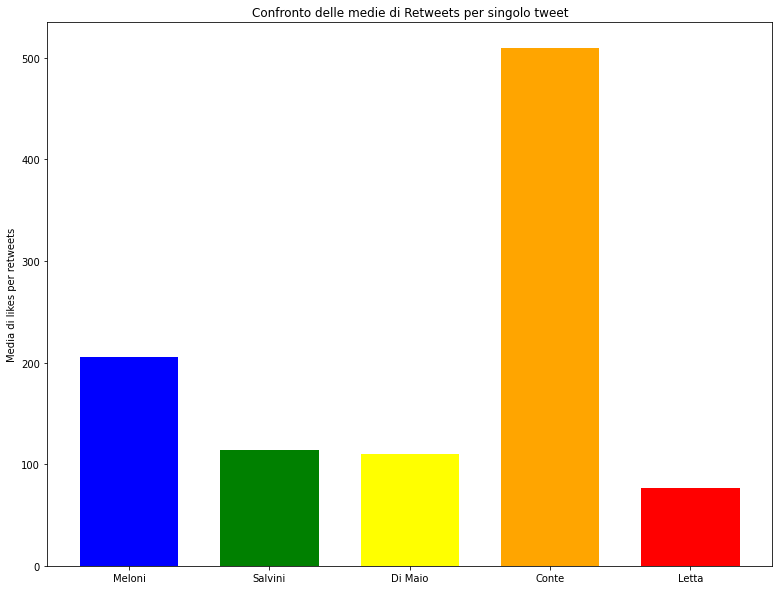

In [ ]:
#Grafici per confronto delle medie di Like e Retweets per un singolo tweet
f, ax = plt.subplots(figsize=(13,10))
croma=["blue","green","yellow","orange","red"]
x=["Meloni","Salvini","Di Maio","Conte","Letta"]
y=[tab_likes_meloni, tab_likes_salvini, tab_likes_maio, tab_likes_conte, tab_likes_letta]
plt.bar(x,y, width=0.7, color=croma)
plt.ylabel("Media di likes per tweet")
plt.title("Confronto delle medie di likes per singolo tweet")
plt.show()

f, ax = plt.subplots(figsize=(13,10))
croma=["blue","green","yellow","orange","red"]
x=["Meloni","Salvini","Di Maio","Conte","Letta"]
y=[tab_rt_meloni, tab_rt_salvini, tab_rt_maio, tab_rt_conte, tab_rt_letta]
plt.bar(x,y, width=0.7, color=croma)
plt.ylabel("Media di likes per retweets")
plt.title("Confronto delle medie di Retweets per singolo tweet")
plt.show()

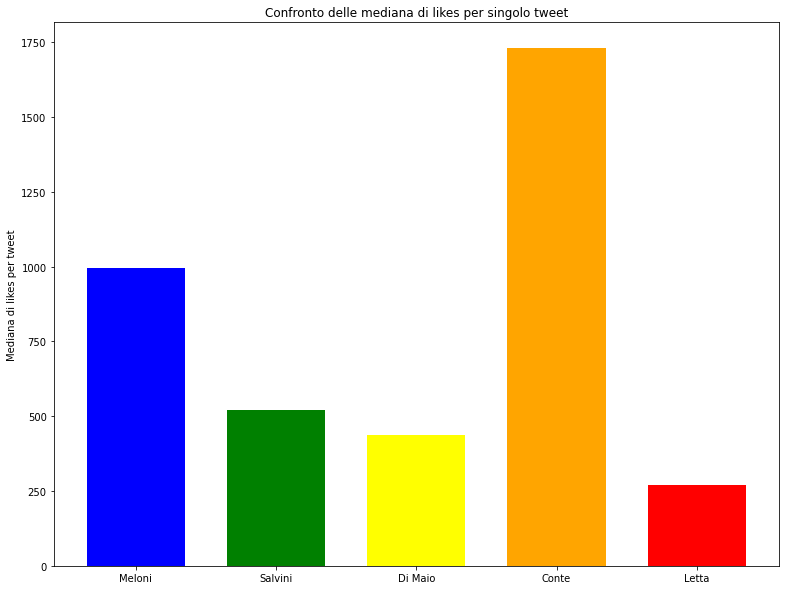

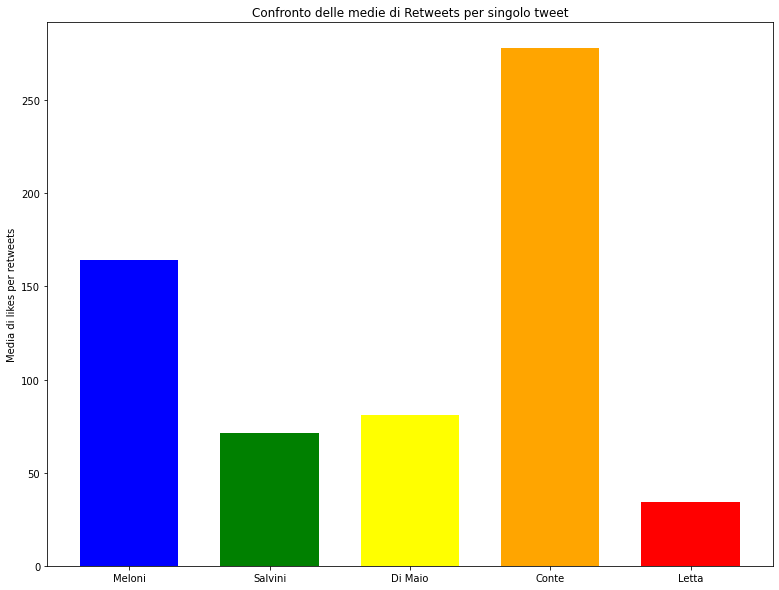

In [ ]:
#Grafici per confronto delle mediane di Like e Retweets per un singolo tweet
f, ax = plt.subplots(figsize=(13,10))
croma=["blue","green","yellow","orange","red"]
x=["Meloni","Salvini","Di Maio","Conte","Letta"]
y=[tab1_likes_meloni, tab1_likes_salvini, tab1_likes_maio, tab1_likes_conte, tab1_likes_letta]
plt.bar(x,y, width=0.7, color=croma)
plt.ylabel("Mediana di likes per tweet")
plt.title("Confronto delle mediana di likes per singolo tweet")
plt.show()

f, ax = plt.subplots(figsize=(13,10))
croma=["blue","green","yellow","orange","red"]
x=["Meloni","Salvini","Di Maio","Conte","Letta"]
y=[tab1_rt_meloni, tab1_rt_salvini, tab1_rt_maio, tab1_rt_conte, tab1_rt_letta]
plt.bar(x,y, width=0.7, color=croma)
plt.ylabel("Media di likes per retweets")
plt.title("Confronto delle medie di Retweets per singolo tweet")
plt.show()

Meloni: 235.88249400479617
Salvini: 189.45362903225808
Di Maio: 209.95489891135304
Conte: 194.90773405698778
Letta: 167.53316326530611


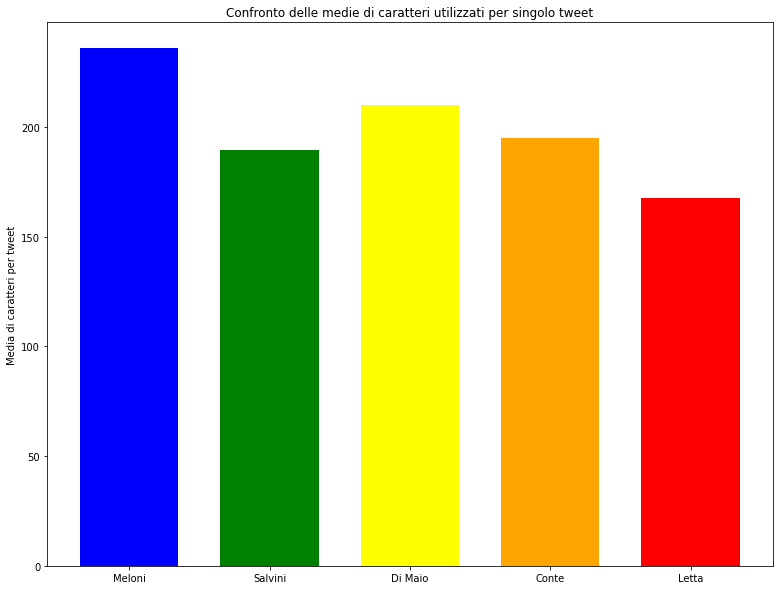

In [ ]:
#Blocco che calcola la media della lunghezza dei tweet

#Tramite il ciclo fro viene fatta scorrere la variabile che contiene gli ID dei profili
#se viene trovata corrispondenza tra l'ID e il nome del politico viene aggiornato un contatore
#e una variabile in cui si aggiunge la lunghezza del testo sommata alla variabile stessa.
#A fine ciclo il contatore ci permette di sapere quanti post erano stati scritti da un singolo
#politico così da poter trarne la media.

for j in range(len(twn)):
  if twn[j]=="EnricoLetta":
    tot_nu=tot_nu+1
    char_letta=char_letta+len(testo[j])

media_char_letta=char_letta/tot_nu

tot_nu=0
for j in range(len(twn)):
  if twn[j]=="matteosalvinimi":
    tot_nu=tot_nu+1
    char_salvini=char_salvini+len(testo[j])

media_char_salvini=char_salvini/tot_nu

tot_nu=0
for j in range(len(twn)):
  if twn[j]=="GiorgiaMeloni":
    tot_nu=tot_nu+1
    char_meloni=char_meloni+len(testo[j])

media_char_meloni=char_meloni/tot_nu

tot_nu=0
for j in range(len(twn)):
  if twn[j]=="luigidimaio":
    tot_nu=tot_nu+1
    char_dimaio=char_dimaio+len(testo[j])

media_char_dimaio=char_dimaio/tot_nu

tot_nu=0
for j in range(len(twn)):
  if twn[j]=="GiuseppeConteIT":
    tot_nu=tot_nu+1
    char_conte=char_conte+len(testo[j])

media_char_conte=char_conte/tot_nu

#Stampa delle medie    
print("Meloni: "+str(media_char_meloni))
print("Salvini: "+str(media_char_salvini))
print("Di Maio: "+str(media_char_dimaio))
print("Conte: "+str(media_char_conte))
print("Letta: "+str(media_char_letta))

#Visualizzazione delle medie su un diagramma a barre
f, ax = plt.subplots(figsize=(13,10))
croma=["blue","green","yellow","orange","red"]
x=["Meloni","Salvini","Di Maio","Conte","Letta"]
y=[media_char_meloni, media_char_salvini, media_char_dimaio, media_char_conte, media_char_letta]
plt.bar(x,y, width=0.7, color=croma)
plt.ylabel("Media di caratteri per tweet")
plt.title("Confronto delle medie di caratteri utilizzati per singolo tweet")
plt.show()

In [ ]:
#Tramite Pandas si richiama la top 10 dei tweets più likati
top10=tabella.loc[tabella.Likes.nlargest(10).index]
top10

,ID,Tweet,Likes,Retweet,Data
2664,GiuseppeConteIT,Io sto con #Fedez. Nessuna censura. https://t....,56734,8694,2021-05-02 09:30:32
2947,GiuseppeConteIT,Silvia Romano è stata liberata! Ringrazio le d...,53501,10376,2020-05-09 15:17:31
2761,GiuseppeConteIT,Congratulations to the American people and ins...,45264,5820,2020-11-07 18:13:35
2650,GiuseppeConteIT,Complimenti ai @thisisManeskin per la vittoria...,31122,3326,2021-05-22 23:00:11
3022,GiuseppeConteIT,"Ognuno di noi, con la propria determinazione, ...",31073,6777,2020-03-14 18:00:30
2993,GiuseppeConteIT,Grazie 🇦🇱 https://t.co/l5JcDMhRYr,29742,4908,2020-03-29 11:11:55
2994,GiuseppeConteIT,L'Unione europea ha un appuntamento con la sto...,27730,4625,2020-03-28 20:18:57
2623,GiuseppeConteIT,L’Italia sul tetto d’Europa!!!\nDopo tante sof...,26911,3266,2021-07-11 22:22:16
2976,GiuseppeConteIT,Grazie a ognuno di voi. Insieme ce la faremo 🇮...,26494,4546,2020-04-11 13:38:16
2944,GiuseppeConteIT,"Bentornata in Italia, Silvia! https://t.co/aWy...",25489,2689,2020-05-10 13:13:17


In [ ]:
#Tramite Pandas si richiama la bottom 10 dei tweets meno likati
bot10=tabella.loc[tabella.Likes.nsmallest(10).index]
bot10

,ID,Tweet,Likes,Retweet,Data
3532,EnricoLetta,@tommibatti00 @alessandroTuzzo @agora_dem @pdn...,1,0,2021-07-17 15:58:09
3533,EnricoLetta,@MrAndrewQ @agora_dem Grazie per esserti iscri...,1,0,2021-07-17 15:56:25
3536,EnricoLetta,@tommibatti00 @alessandroTuzzo Tommaso la invi...,2,0,2021-07-17 13:24:10
3530,EnricoLetta,@MabIvo Veramente l’Agorà era nella Grecia ant...,4,0,2021-07-17 16:22:36
3529,EnricoLetta,@espositopasqual @pdnetwork @agora_dem @Senato...,6,1,2021-07-17 16:27:04
3531,EnricoLetta,@espositopasqual @pdnetwork @agora_dem @Senato...,6,2,2021-07-17 16:09:26
3323,EnricoLetta,Comment rendre les jeunes acteurs du changemen...,19,3,2021-09-30 13:58:12
3338,EnricoLetta,Congratulations! Looking forward to cooperatin...,19,4,2021-09-29 07:16:38
3539,EnricoLetta,@latwittipe Le @agora_dem per avere un @pdnetw...,21,1,2021-07-17 11:48:00
3262,EnricoLetta,Ora a @radioanchio.,29,1,2021-10-14 06:36:43


In [ ]:
#Codice per la raccolta e la tokenizzazione delle parole di ogni singolo esponente 
#al fine di poter calcolare quali sono le più utilizzate.

#L'array scorre l'intera variabile che contiene gli ID dei Tweets, entrando 
#nell'if quando viene trovato il nome desiderato. Qui, tramite la funzione
#append viene viene collocata in una variabile il testo del singolo tweet.
for i in range(len(twn)):
  if twn[i]=="GiorgiaMeloni":
    tweet_meloni.append(testo[i])

for i in range(len(twn)):
  if twn[i]=="matteosalvinimi":
    tweet_salvini.append(testo[i])

for i in range(len(twn)):
  if twn[i]=="luigidimaio":
    tweet_dimaio.append(testo[i])

for i in range(len(twn)):
  if twn[i]=="GiuseppeConteIT":
    tweet_conte.append(testo[i])

for i in range(len(twn)):
  if twn[i]=="EnricoLetta":
    tweet_letta.append(testo[i])

#La variabile precedentemente creata, contenente tutti i tweets del singolo
#esponente politico viene ora "normalizzata". Dal testo vengono rimossi
#caratteri speciali, richiamando la funzione dichiarata all'inizio ed eventuali
#link. Poi tutte le parole vengono rese in minuscolo per evitare ripetizioni.
#Inoltre, vengono eliminate le stopwords e poi contante le singole parole per 
#poi inserire in un dataframe le 10 parole più comuni.

meloni_norm=[remove_url(tweet_meloni) for tweet_meloni in tweet_meloni]  #Rimozione URL e caratteri speciali.
lista_meloni=[meloni_norm.lower().split() for meloni_norm in meloni_norm] #Messa in minuscolo.
for tutte_par in lista_meloni: #Climinazione delle stopwords.
    for tweet_meloni in tutte_par:
      token_meloni = [[parola for parola in lista_meloni if not parola in stop_words] 
              for lista_meloni in lista_meloni]
appoggio_meloni= list(itertools.chain(*token_meloni))  #Creazione di una lista delle parole.
contatore_parole_meloni = collections.Counter(appoggio_meloni) #Conteggio delle ripetizioni.
tabella_meloni_parole = pd.DataFrame(contatore_parole_meloni.most_common(10), columns=['Parole', 'Ripetizioni']) #Creazione della tabella.

salvini_norm=[remove_url(tweet_salvini) for tweet_salvini in tweet_salvini] 
lista_salvini=[salvini_norm.lower().split() for salvini_norm in salvini_norm] 
for tutte_par in lista_salvini:
    for tweet_salvini in tutte_par:
      token_salvini = [[parola for parola in lista_salvini if not parola in stop_words]
              for lista_salvini in lista_salvini]
appoggio_salvini = list(itertools.chain(*token_salvini))
contatore_parole_salvini = collections.Counter(appoggio_salvini) 
tabella_salvini_parole = pd.DataFrame(contatore_parole_salvini.most_common(10), columns=['Parole', 'Ripetizioni'])

dimaio_norm=[remove_url(tweet_dimaio) for tweet_dimaio in tweet_dimaio] 
lista_dimaio=[dimaio_norm.lower().split() for dimaio_norm in dimaio_norm] 
for tutte_par in lista_dimaio:
    for tweet_dimaio in tutte_par:
      token_dimaio = [[parola for parola in lista_dimaio if not parola in stop_words]
              for lista_dimaio in lista_dimaio]
appoggio_dimaio = list(itertools.chain(*token_dimaio)) 
contatore_parole_dimaio = collections.Counter(appoggio_dimaio) 
tabella_dimaio_parole = pd.DataFrame(contatore_parole_dimaio.most_common(10), columns=['Parole', 'Ripetizioni'])

conte_norm=[remove_url(tweet_conte) for tweet_conte in tweet_conte] 
lista_conte=[conte_norm.lower().split() for conte_norm in conte_norm] 
for tutte_par in lista_conte:
    for tweet_conte in tutte_par:
      token_conte = [[parola for parola in lista_conte if not parola in stop_words]
              for lista_conte in lista_conte]
appoggio_conte = list(itertools.chain(*token_conte))
contatore_parole_conte = collections.Counter(appoggio_conte) 
tabella_conte_parole = pd.DataFrame(contatore_parole_conte.most_common(10), columns=['Parole', 'Ripetizioni'])

letta_norm=[remove_url(tweet_letta) for tweet_letta in tweet_letta] 
lista_letta=[letta_norm.lower().split() for letta_norm in letta_norm] 
for tutte_par in lista_letta:
    for tweet_letta in tutte_par:
      token_letta = [[parola for parola in lista_letta if not parola in stop_words]
              for lista_letta in lista_letta]
appoggio_letta = list(itertools.chain(*token_letta)) 
contatore_parole_letta = collections.Counter(appoggio_letta) 
tabella_letta_parole = pd.DataFrame(contatore_parole_letta.most_common(10), columns=['Parole', 'Ripetizioni'])

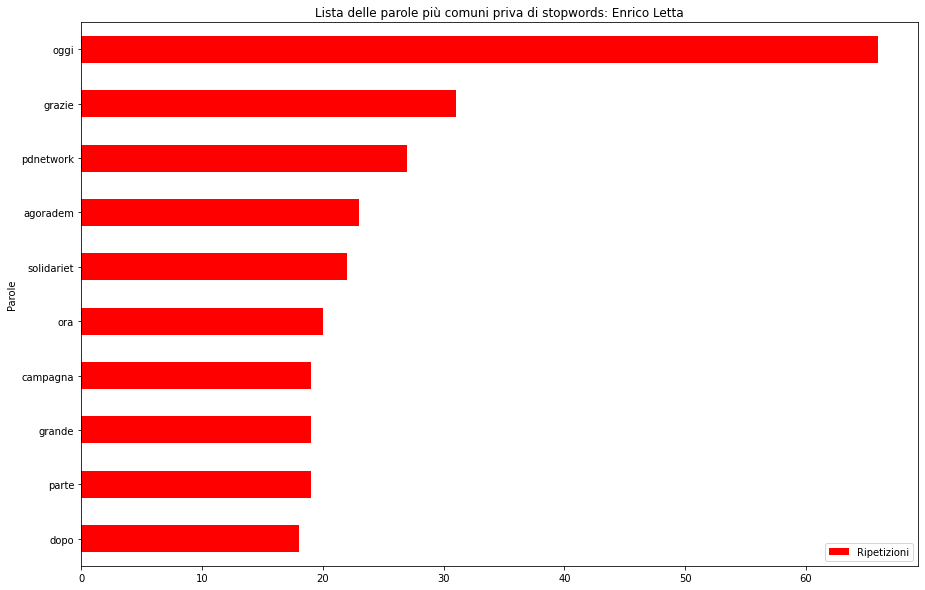

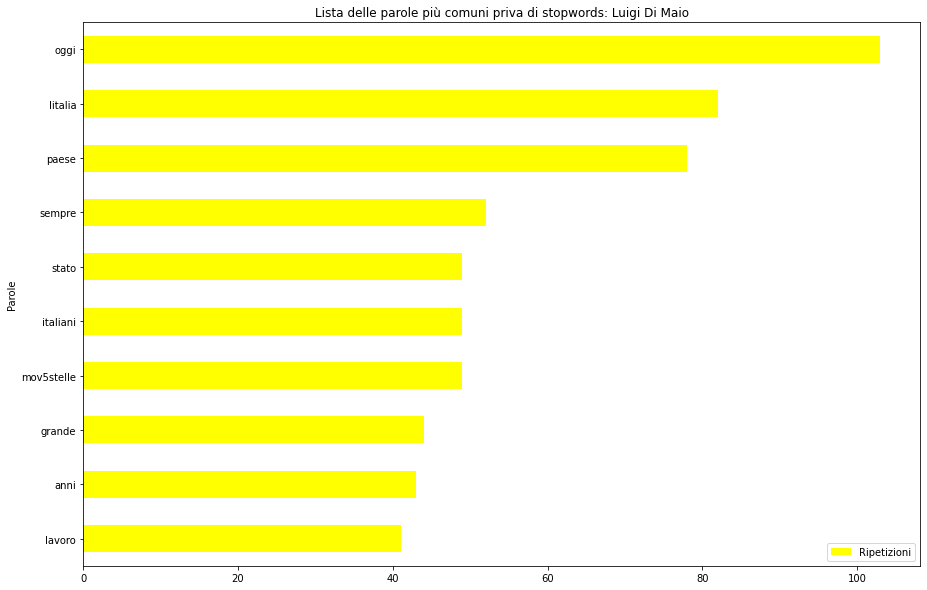

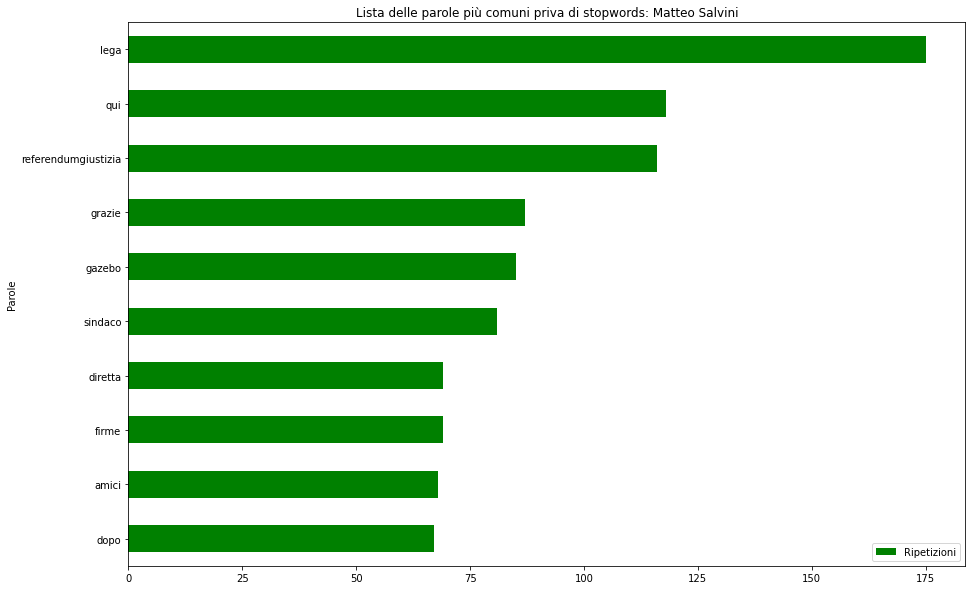

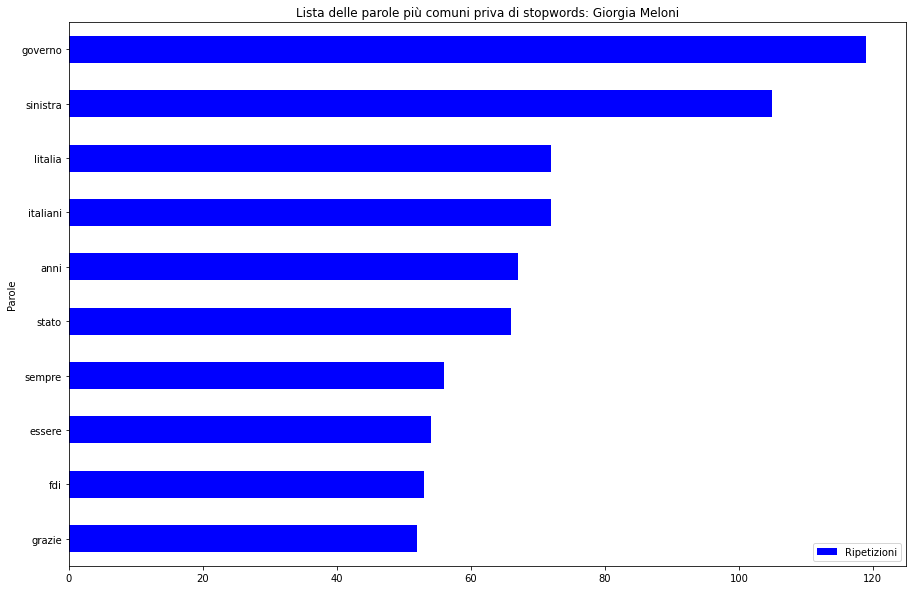

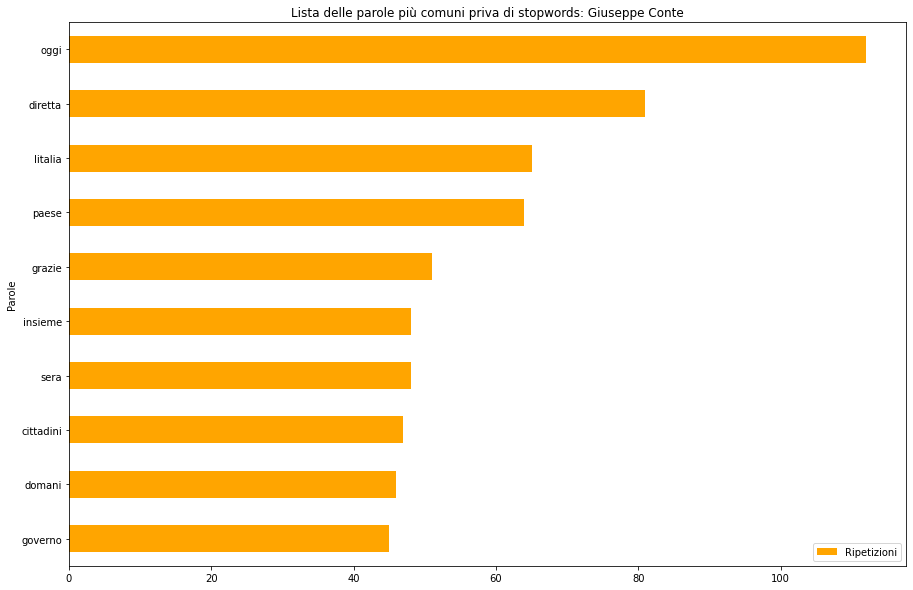

In [ ]:
#Grafici dei singoli esponenti con le dieci parole più utilizzate.

fig, ax = plt.subplots(figsize=(15, 10))
tabella_letta_parole.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="red")
ax.set_title("Lista delle parole più comuni priva di stopwords: Enrico Letta")
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
tabella_dimaio_parole.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="yellow")
ax.set_title("Lista delle parole più comuni priva di stopwords: Luigi Di Maio")
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
tabella_salvini_parole.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="green")
ax.set_title("Lista delle parole più comuni priva di stopwords: Matteo Salvini")
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
tabella_meloni_parole.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="blue")
ax.set_title("Lista delle parole più comuni priva di stopwords: Giorgia Meloni")
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
tabella_conte_parole.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="orange")
ax.set_title("Lista delle parole più comuni priva di stopwords: Giuseppe Conte")
plt.show()

In [ ]:
tabella_letta_parole #Tabella con la top 10 delle parole utilizzate da Letta

,Parole,Ripetizioni
0,oggi,66
1,grazie,31
2,pdnetwork,27
3,agoradem,23
4,solidariet,22
5,ora,20
6,parte,19
7,grande,19
8,campagna,19
9,dopo,18


In [ ]:
tabella_salvini_parole  #Tabella con la top 10 delle parole utilizzate da Letta

,Parole,Ripetizioni
0,lega,175
1,qui,118
2,referendumgiustizia,116
3,grazie,87
4,gazebo,85
5,sindaco,81
6,firme,69
7,diretta,69
8,amici,68
9,dopo,67


In [ ]:
tabella_dimaio_parole #Tabella con la top 10 delle parole utilizzate da Letta

,Parole,Ripetizioni
0,oggi,103
1,litalia,82
2,paese,78
3,sempre,52
4,mov5stelle,49
5,italiani,49
6,stato,49
7,grande,44
8,anni,43
9,lavoro,41


In [ ]:
tabella_meloni_parole #Tabella con la top 10 delle parole utilizzate da Letta

,Parole,Ripetizioni
0,governo,119
1,sinistra,105
2,italiani,72
3,litalia,72
4,anni,67
5,stato,66
6,sempre,56
7,essere,54
8,fdi,53
9,grazie,52


In [ ]:
tabella_conte_parole #Tabella con la top 10 delle parole utilizzate da Letta

,Parole,Ripetizioni
0,oggi,112
1,diretta,81
2,litalia,65
3,paese,64
4,grazie,51
5,sera,48
6,insieme,48
7,cittadini,47
8,domani,46
9,governo,45


In [ ]:
#L'operazione prima eseguita per ogni singolo esponente politico viene qui invece
#fatta per la totalità dei Tweets così da vedere in maniera globale la top 10
#delle parole più utilizzate.

dati_norm=[remove_url(testo) for testo in testo]
lista_parole=[dati_norm.lower().split() for dati_norm in dati_norm] 
for tutte_par in lista_parole:
    for testo in tutte_par:
      parole_singole = [[parola for parola in lista_parole if not parola in stop_words]
              for lista_parole in lista_parole]
appoggio2 = list(itertools.chain(*parole_singole)) 
contatore_parole = collections.Counter(appoggio2) 
risultato_fin = pd.DataFrame(contatore_parole.most_common(10),columns=['Parole', 'Ripetizioni'])
risultato_fin

,Parole,Ripetizioni
0,oggi,385
1,litalia,264
2,grazie,257
3,governo,226
4,italiani,206
5,anni,194
6,diretta,191
7,paese,191
8,lavoro,185
9,stato,179


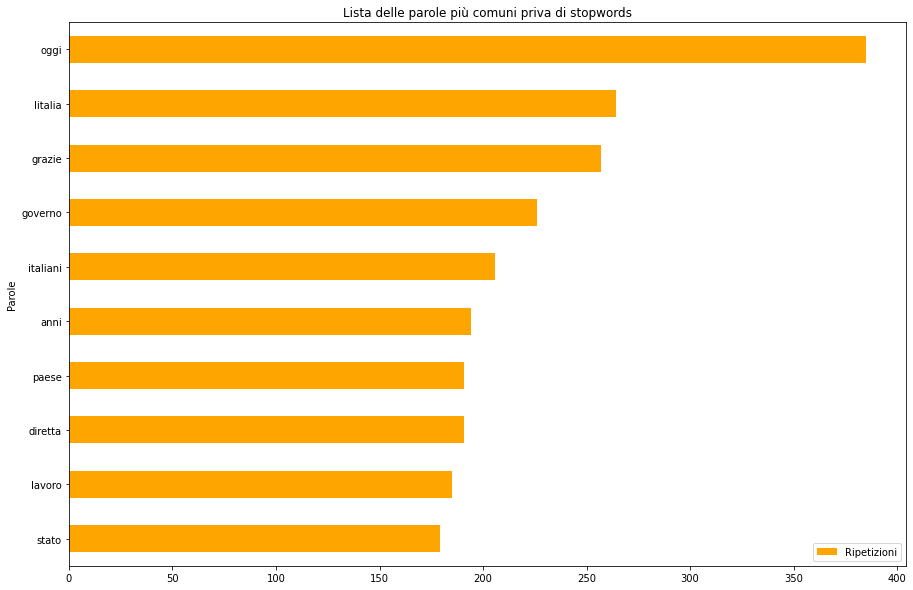

In [ ]:
#Stampa del grafico con la lista delle 10 parole più comuni nella totalità dei tweets.

fig, ax = plt.subplots(figsize=(15, 10))
risultato_fin.sort_values(by='Ripetizioni').plot.barh(x='Parole',y='Ripetizioni',ax=ax,color="orange")
ax.set_title("Lista delle parole più comuni priva di stopwords")
plt.show()

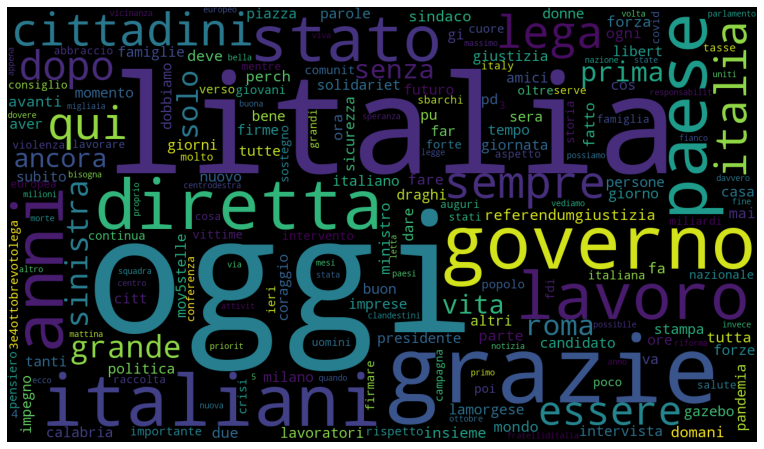

In [ ]:
#Blocco di istruzioni per la creazione di un wordcloud tramite l'ausilio della#libreria WordCloud.

conteggio=Counter(contatore_parole) #Variabile contenente il conteggio della ripetizione delle parole, realizzata tramite l'ausilio della libreria collections
wordcloud = WordCloud(width = 1250, height = 725).generate_from_frequencies(conteggio) 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [5]:
#il blocco sottostante si occupa di ricercare 1000 tweets che menzionano salvini
name_lista_salvini=[]
testo_mention_salvini=[]
parola_chiave_1 = '@matteosalvinimi'
filtro='-filter:retweets'
tweets_sal = tweepy.Cursor(api.search, q=parola_chiave_1+filtro, lang="it").items(num_max_tweets)
for tweet in tweets_sal:
 testo_mention_salvini.append(tweet.text)
 name_lista_salvini.append(tweet.author.name)
mention_sal_tab=pd.DataFrame({"ID":name_lista_salvini, "Tweet":testo_mention_salvini})
#il blocco sottostante si occupa di ricercare 1000 tweets che menzionano meloni
name_lista_mel=[]
testo_mention_mel=[]
parola_chiave_2 = '@GiorgiaMeloni'
filtro='-filter:retweets'
tweets_mel = tweepy.Cursor(api.search, q=parola_chiave_2+filtro, lang="it").items(num_max_tweets)
for tweet in tweets_mel:
 testo_mention_mel.append(tweet.text)
 name_lista_mel.append(tweet.author.name)
mention_mel_tab=pd.DataFrame({"ID":name_lista_mel, "Tweet":testo_mention_mel})
#il blocco sottostante si occupa di ricercare 1000 tweets che menzionano letta
name_lista_let=[]
testo_mention_let=[]
parola_chiave_3 = '@EnricoLetta'
filtro='-filter:retweets'
tweets_let = tweepy.Cursor(api.search, q=parola_chiave_3+filtro, lang="it").items(num_max_tweets)
for tweet in tweets_let:
 testo_mention_let.append(tweet.text)
 name_lista_let.append(tweet.author.name)
mention_let_tab=pd.DataFrame({"ID":name_lista_let, "Tweet":testo_mention_let})
#il blocco sottostante si occupa di ricercare 1000 tweets che menzionano conte
name_lista_cont=[]
testo_mention_cont=[]
parola_chiave_4 = '@GiuseppeConteIT'
filtro='-filter:retweets'
tweets_cont = tweepy.Cursor(api.search, q=parola_chiave_4+filtro, lang="it").items(num_max_tweets)
for tweet in tweets_cont:
 testo_mention_cont.append(tweet.text)
 name_lista_cont.append(tweet.author.name)
mention_cont_tab=pd.DataFrame({"ID":name_lista_cont, "Tweet":testo_mention_cont})
#il blocco sottostante si occupa di ricercare 1000 tweets che menzionano dimaio
name_lista_maio=[]
testo_mention_maio=[]
parola_chiave_5 = '@luigidimaio'
filtro='-filter:retweets'
tweets_maio = tweepy.Cursor(api.search, q=parola_chiave_5+filtro, lang="it").items(num_max_tweets)
for tweet in tweets_maio:
 testo_mention_maio.append(tweet.text)
 name_lista_maio.append(tweet.author.name)
mention_maio_tab=pd.DataFrame({"ID":name_lista_maio, "Tweet":testo_mention_maio})

In [6]:
#Blocco che esegue la emotion analysis con l'ausilio della libreria preposta
emo=EmotionClassifier()
emotion_salvini=emo.predict(testo_mention_salvini)
emotion_letta=emo.predict(testo_mention_let)
emotion_meloni=emo.predict(testo_mention_mel)
emotion_maio=emo.predict(testo_mention_maio)
emotion_conte=emo.predict(testo_mention_cont)

Downloading:   0%|          | 0.00/899 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [7]:
#Blocco che esegue la sentiment analysis con l'ausilio della libreria preposta
sent=SentimentClassifier()
sentiment_salvini=sent.predict(testo_mention_salvini)
sentiment_letta=sent.predict(testo_mention_let)
sentiment_meloni=sent.predict(testo_mention_mel)
sentiment_maio=sent.predict(testo_mention_maio)
sentiment_conte=sent.predict(testo_mention_cont)

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [8]:
#Blocco che crea i data frame con i tweet che mensionano i singoli esponenti, l'id di coloro che lo scrivono e il risultato della sentiment ed emotion analysis
mention_sal_tab=pd.DataFrame({"ID":name_lista_salvini,"Testo":testo_mention_salvini,"Sentiment":sentiment_salvini,"Emotion":emotion_salvini, "Mention":parola_chiave_1})
mention_let_tab=pd.DataFrame({"ID":name_lista_let,"Testo":testo_mention_let,"Sentiment":sentiment_letta,"Emotion":emotion_letta,"Mention":parola_chiave_2})
mention_mel_tab=pd.DataFrame({"ID":name_lista_mel,"Testo":testo_mention_mel,"Sentiment":sentiment_meloni,"Emotion":emotion_meloni,"Mention":parola_chiave_3})
mention_conte_tab=pd.DataFrame({"ID":name_lista_cont,"Testo":testo_mention_cont,"Sentiment":sentiment_conte,"Emotion":emotion_conte,"Mention":parola_chiave_4})
mention_maio_tab=pd.DataFrame({"ID":name_lista_maio,"Testo":testo_mention_maio,"Sentiment":sentiment_maio,"Emotion":emotion_maio, "Mention":parola_chiave_5})

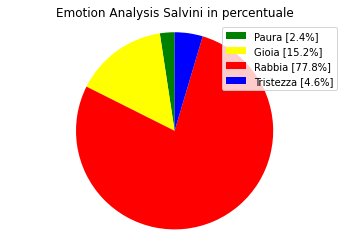

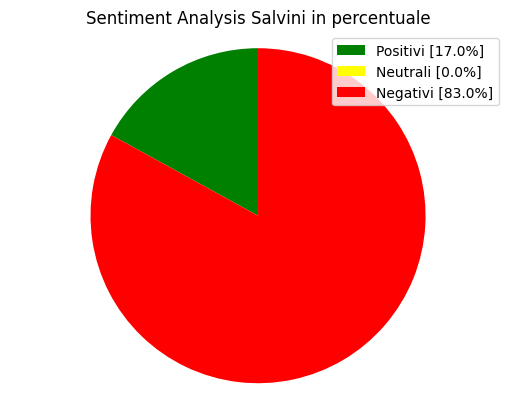

In [9]:
sentiment_emotion(mention_sal_tab,"Salvini")#Risultati della sentiment & della emotion analysis in percentuale

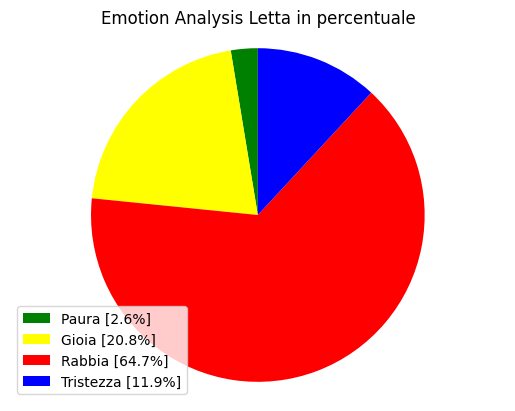

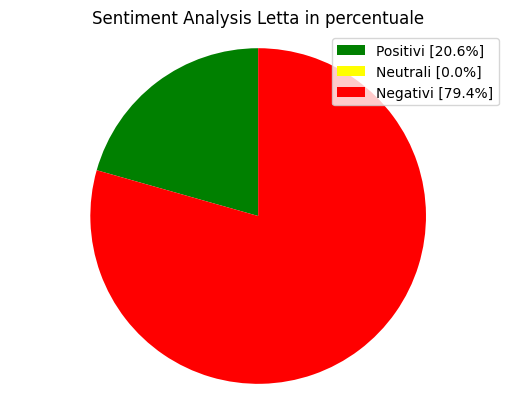

In [10]:
sentiment_emotion(mention_let_tab,"Letta")#Risultati della sentiment & della emotion analysis in percentuale

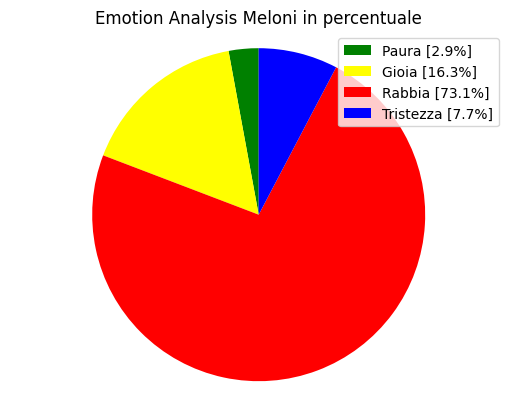

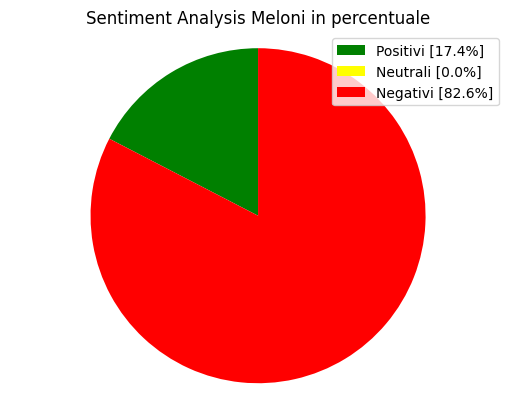

In [11]:
sentiment_emotion(mention_mel_tab,"Meloni")#Risultati della sentiment & della emotion analysis in percentuale

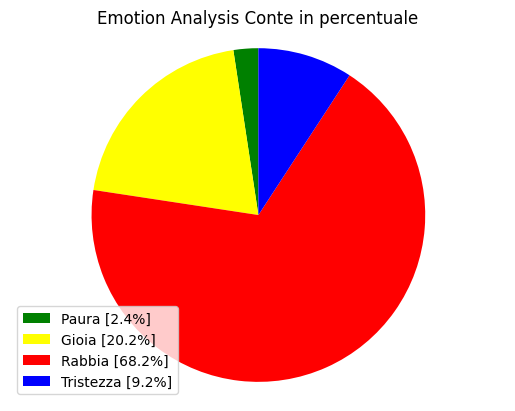

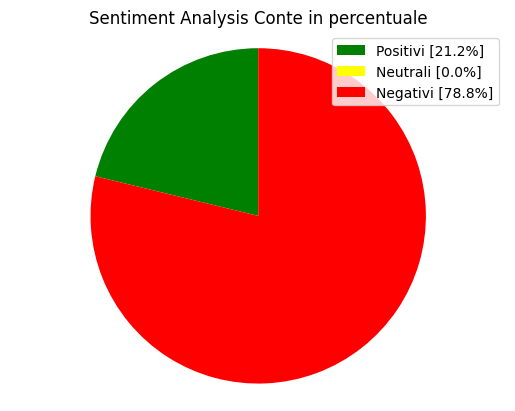

In [12]:
sentiment_emotion(mention_conte_tab,"Conte")#Risultati della sentiment & della emotion analysis in percentuale

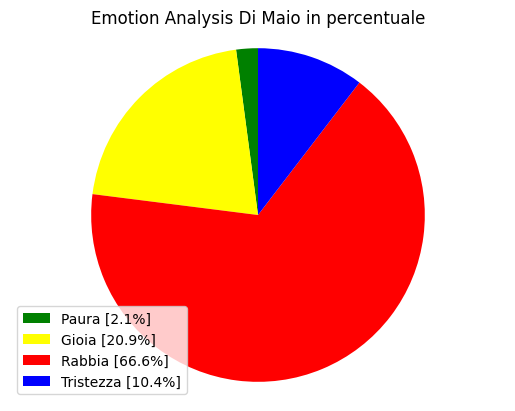

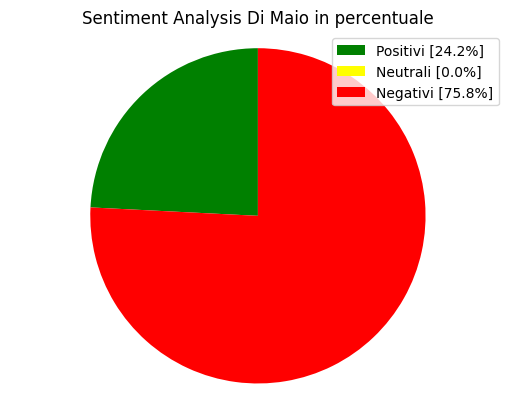

In [13]:
sentiment_emotion(mention_maio_tab,"Di Maio")#Risultati della sentiment & della emotion analysis in percentuale

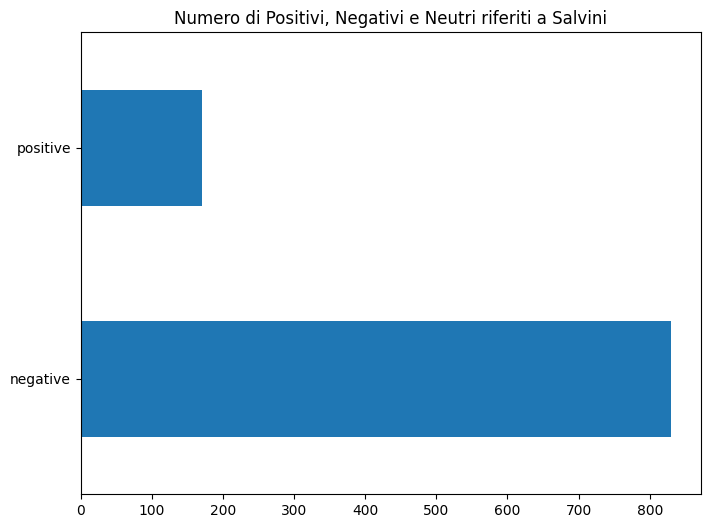

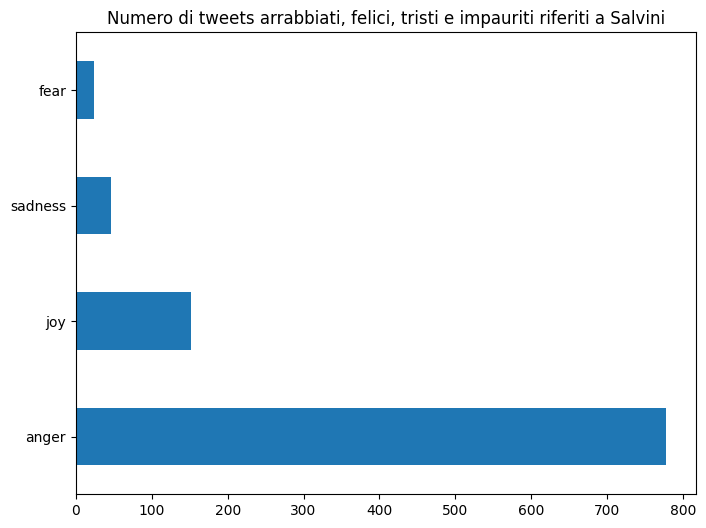

In [14]:
grafici_num(mention_sal_tab,"Salvini")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti a Salvini

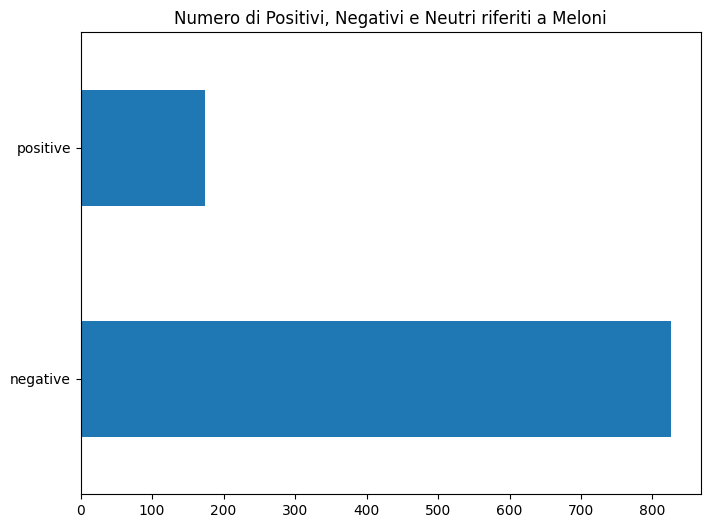

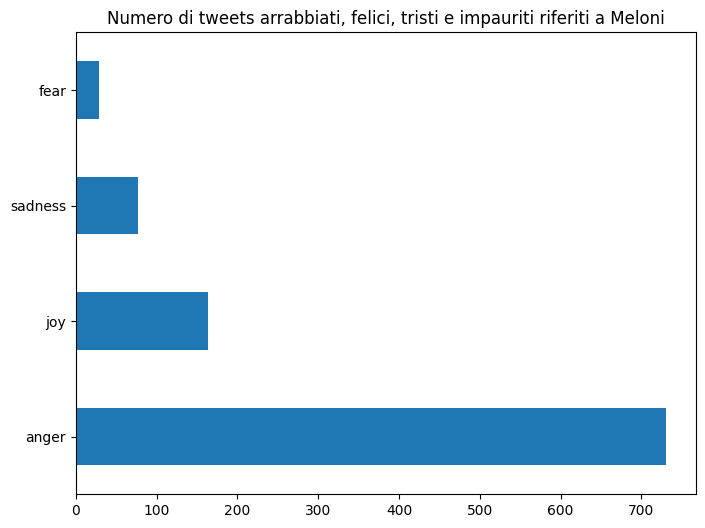

In [15]:
grafici_num(mention_mel_tab,"Meloni")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti a Meloni

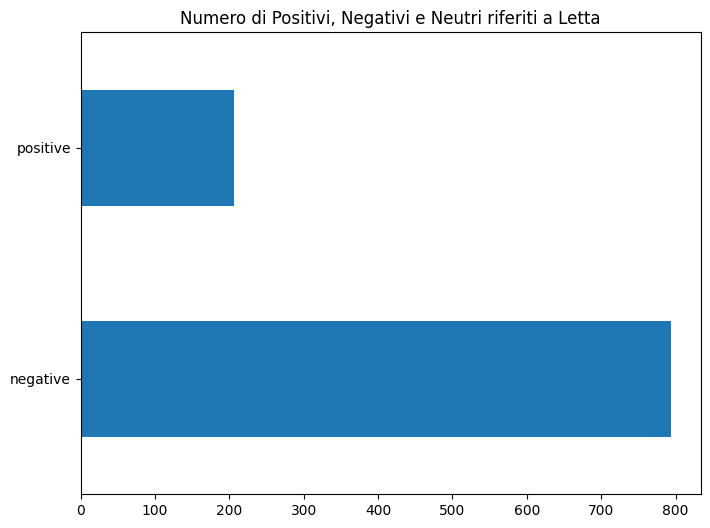

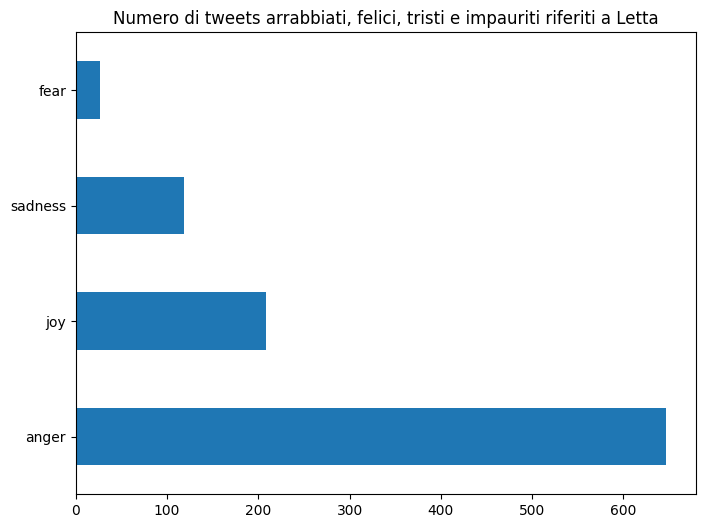

In [16]:
grafici_num(mention_let_tab,"Letta")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti a Letta

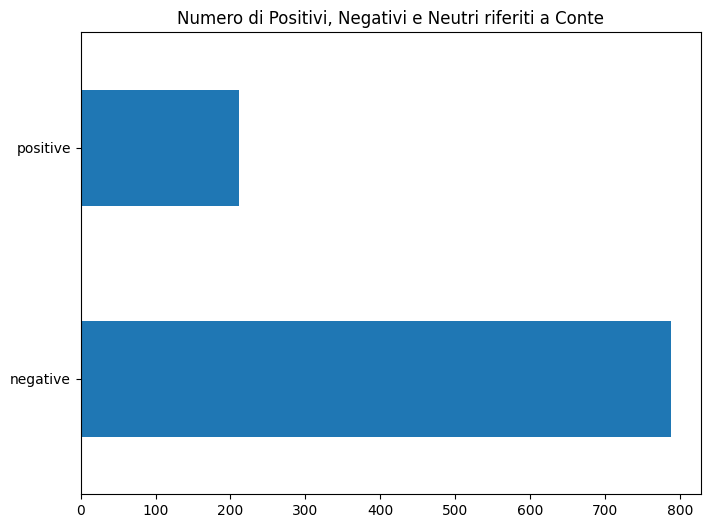

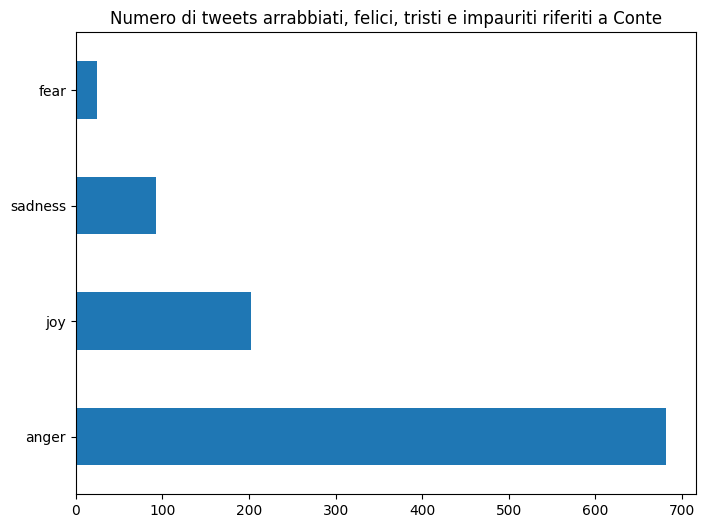

In [17]:
grafici_num(mention_conte_tab,"Conte")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti a Conte

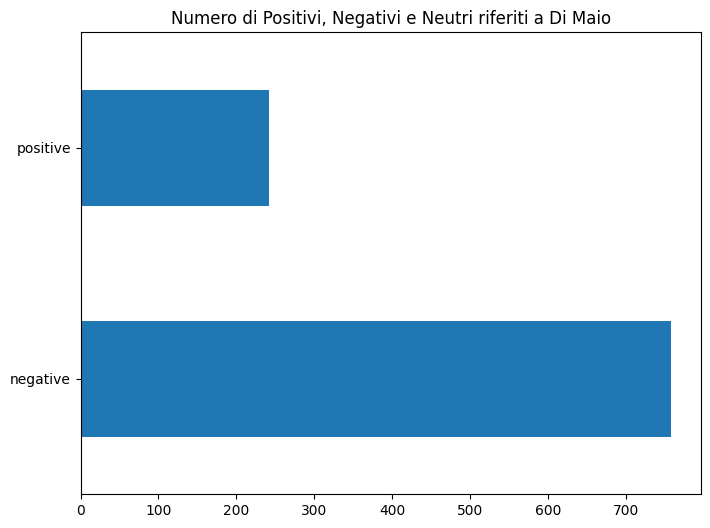

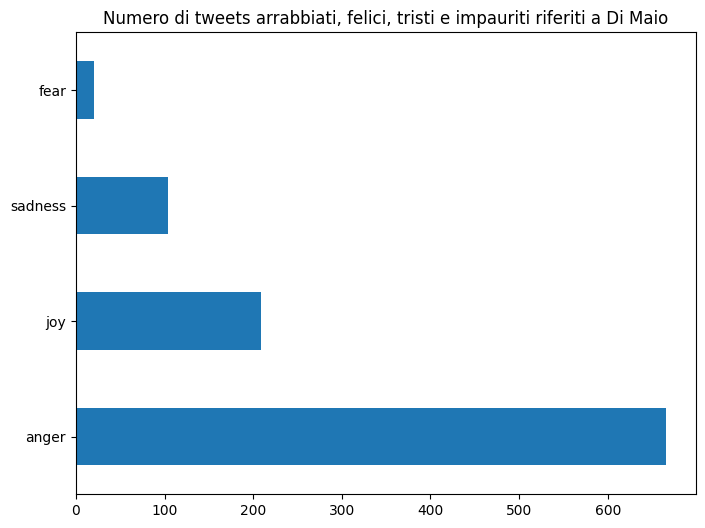

In [18]:
grafici_num(mention_maio_tab,"Di Maio")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti a Di Maio

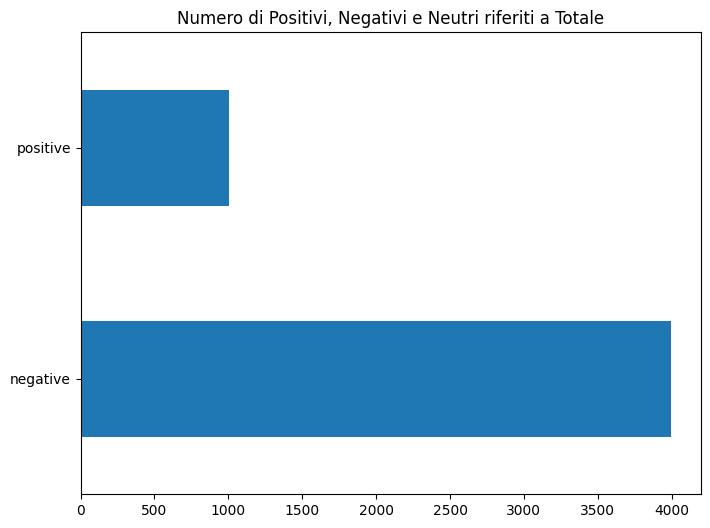

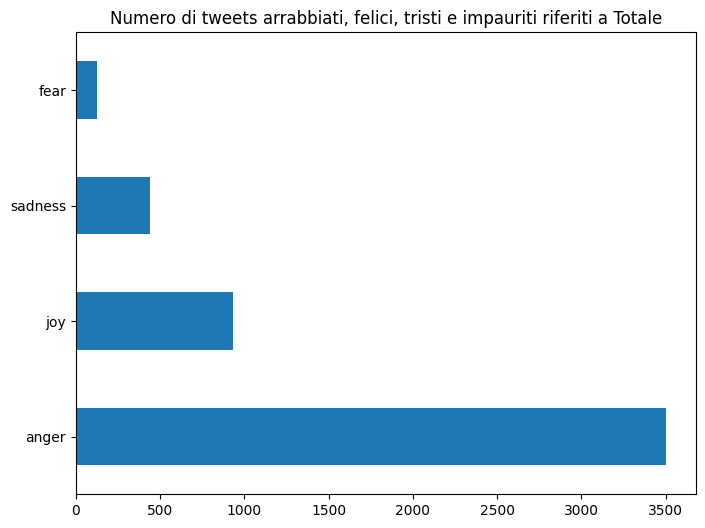

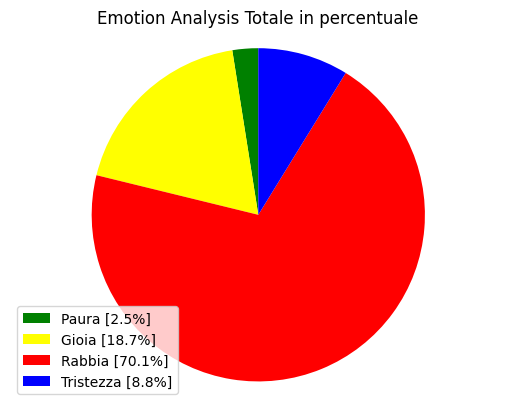

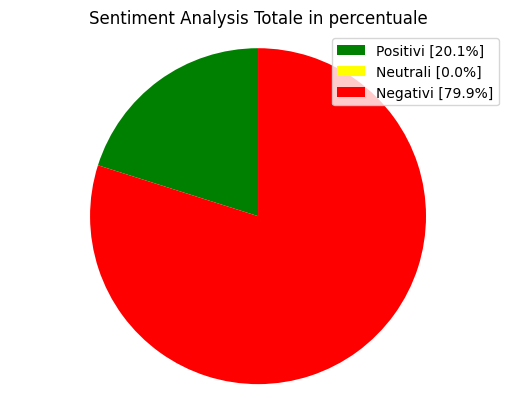

In [19]:
mention_total = pd.concat([mention_sal_tab, mention_let_tab, mention_conte_tab, mention_maio_tab, mention_mel_tab]) #Unione dei 5 dataframe delle menzioni 
grafici_num(mention_total,"Totale")#Risultati della sentiment & della emotion analysis in percentuale
sentiment_emotion(mention_total,"Totale")#Numero di tweets neg, pos, neut & fel, arr, imp,tristi riferiti al totale

In [20]:
mention_total

,ID,Testo,Sentiment,Emotion,Mention
0,Ripper,Comunque ogni volta che c'è Salvini allo stadi...,negative,anger,@matteosalvinimi
1,V,@Marcell77640487 @SoniaLaVera @matteosalvinimi...,negative,anger,@matteosalvinimi
2,🇸​🇦​🇧​🇷​🇮​🇳​🇦​ ❤️⚓🎸🌞🪁,"Ghali sei un gran buffone,strafottente maleduc...",negative,anger,@matteosalvinimi
3,elena chrysos 🇮🇹🇬🇷,@matteosalvinimi Hai rotto. Se non fate qualco...,negative,anger,@matteosalvinimi
4,Leonardo L.,@matteosalvinimi Tagliatevi gli stipendi casomai,negative,anger,@matteosalvinimi
...,...,...,...,...,...
995,Adriana 🇮🇹,@FratellidItalia @GiorgiaMeloni @Controcorrent...,negative,sadness,@EnricoLetta
996,Mia Capparetti,@GiorgiaMeloni Direi che siamo passati a notiz...,negative,anger,@EnricoLetta
997,GrindsMyGears ✝️=💩=☪️,@Marisa55364899 @GiorgiaMeloni Hanno ragione i...,negative,anger,@EnricoLetta
998,Gimmi🇮🇹🏴‍☠️🇮🇹,@GiorgiaMeloni @Filomen30847137 @FratellidItal...,negative,anger,@EnricoLetta


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127475 missing from current font.
  fon

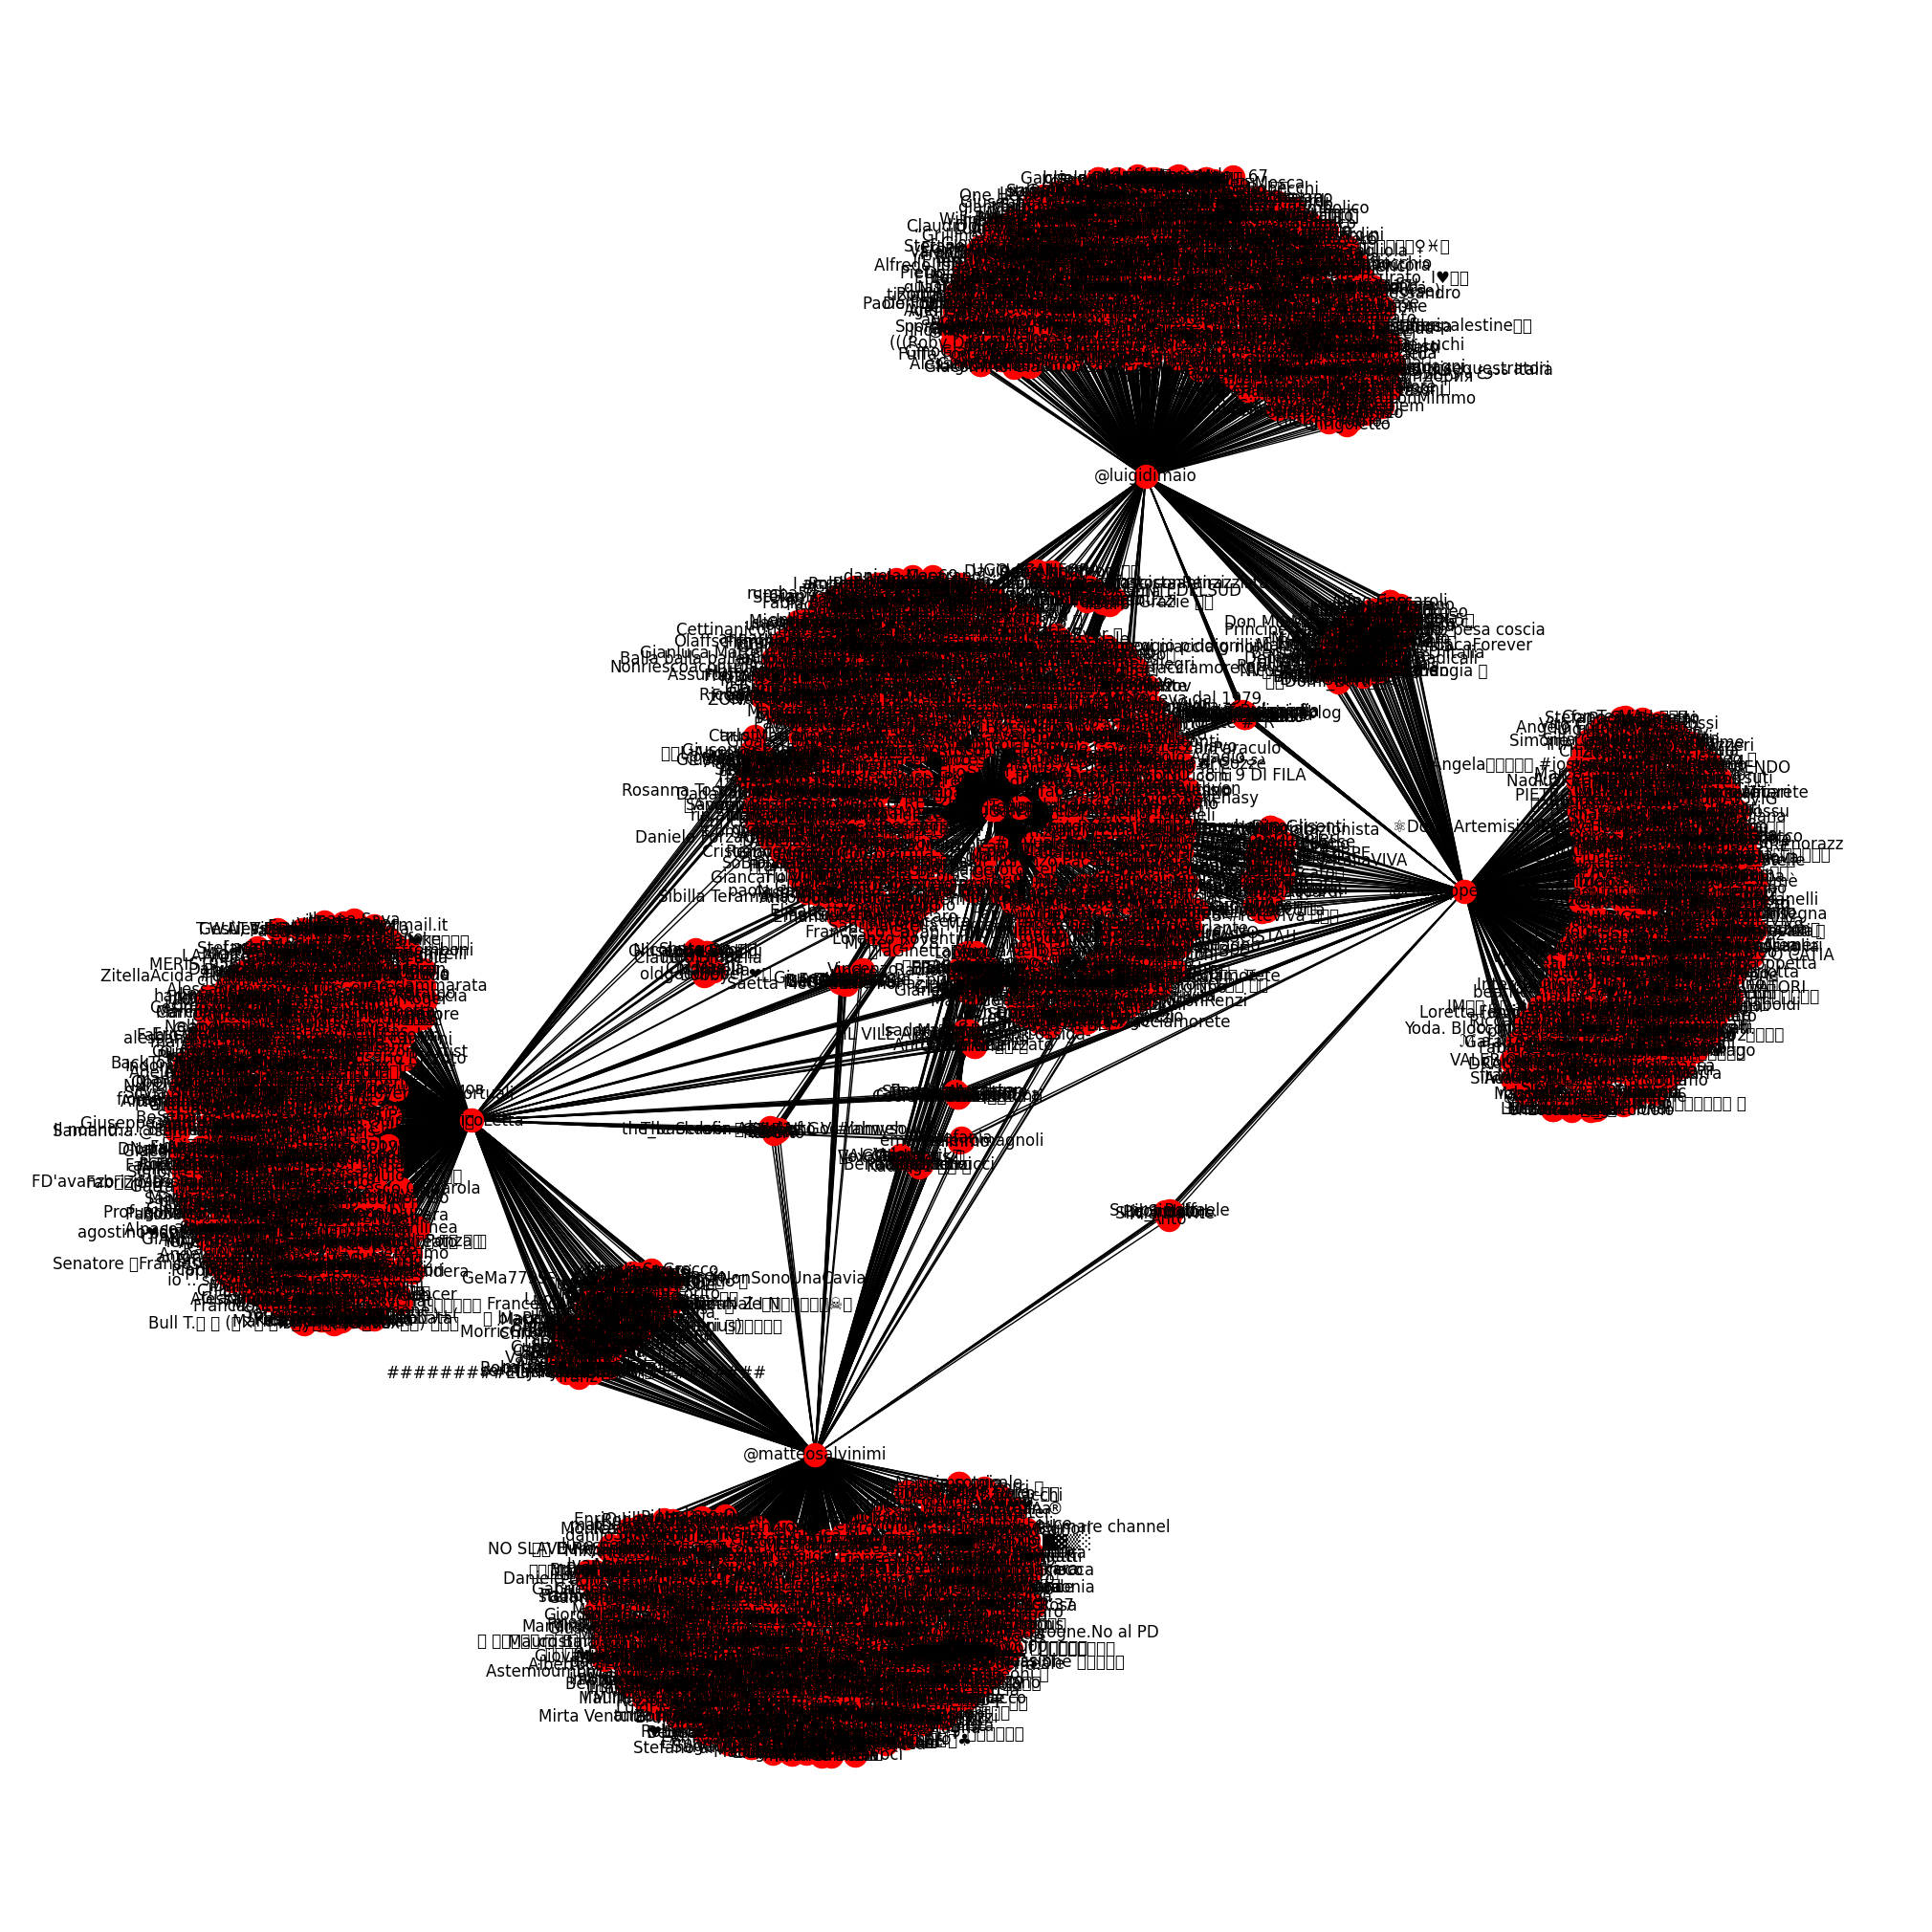

In [21]:
grafico_social= nx.from_pandas_edgelist(mention_total, source="ID",target="Mention")
plt.figure(figsize=(20,20))
pos = nx.spring_layout(grafico_social, k=0.80,)  # default to scale=1
nx.draw(grafico_social, with_labels=True, node_color="red")
plt.show()

In [22]:
info=nx.info(grafico_social)
cliq=nx.find_cliques(grafico_social)
cliqes=len(list(cliq))
print("There are ", cliqes, "cliques into the network")
print(info)
print("Density of the Network:", nx.density(grafico_social))
print("Diameter of the network:",nx.diameter(grafico_social))

There are  3300 cliques into the network
Graph with 2789 nodes and 3300 edges
Density of the Network: 0.0008487946858250773
Diameter of the network: 4


In [23]:
#Vengono assegnati i nomi e il degree di ogni singolo nodo e poi stampate in una tabella
nome = [node for (node, val) in grafico_social.degree()]
degrees = [val for (node, val) in grafico_social.degree()]
degree_df=pd.DataFrame({"Node":nome, "Degrees":degrees})
degree_df.iloc[np.argsort(degree_df["Degrees"])]

,Node,Degrees
0,Ripper,1
1879,NOMOS Centro Studi Parlamentari,1
1880,Severino Nappi,1
1881,willer,1
1882,Dolce Vita,1
...,...,...
1361,@GiuseppeConteIT,573
2336,@EnricoLetta,656
1847,@luigidimaio,670
720,@GiorgiaMeloni,683


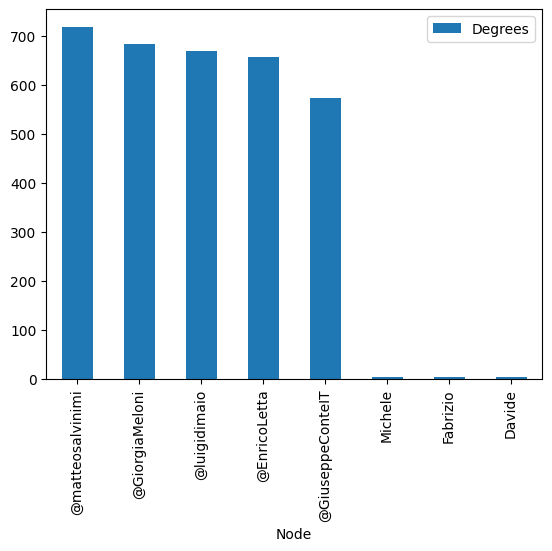

In [24]:
degree_top=degree_df.loc[degree_df.Degrees.nlargest(8).index]
degree_top.plot(x="Node", y="Degrees", kind="bar")

In [25]:
#nodo pià influente
degree_centrality=nxa.degree_centrality(grafico_social) 
degree_centrality_df=pd.DataFrame({"Degree_Centrality":degree_centrality})
degree_centrality_df.iloc[np.argsort(degree_centrality_df["Degree_Centrality"])]

,Degree_Centrality
Ludovica A.,0.000359
Paola79,0.000359
Paolinha,0.000359
osvaldoluci,0.000359
Paolo 04/02/58,0.000359
...,...
@GiuseppeConteIT,0.205524
@EnricoLetta,0.235294
@luigidimaio,0.240316
@GiorgiaMeloni,0.244978


In [26]:
#Funzione per il calcolo della Betweeness e messa in ordine ascendente (il miglior connettore)
betweeness=nx.betweenness_centrality(grafico_social)
betweeness_df=pd.DataFrame({"Betweeness":betweeness})
betweeness_df.iloc[np.argsort(betweeness_df["Betweeness"])]

,Betweeness
MGS,0.000000
Pat Oliva,0.000000
primaverina@annamaria,0.000000
PatriotaAnti UE 🇮🇹🇨🇭 🇪🇺=💩 (new profilo),0.000000
Patrizia Abramo,0.000000
...,...
@GiuseppeConteIT,0.293877
@EnricoLetta,0.333193
@luigidimaio,0.348929
@matteosalvinimi,0.370193


In [27]:
closeness=nxa.closeness_centrality(grafico_social)
closeness_df=pd.DataFrame({"Closeness":closeness})
closeness_df.iloc[np.argsort(closeness_df["Closeness"])]

,Closeness
Banksy,0.278772
jhonny,0.278772
Vito Chiariello 🇮🇹🇪🇺,0.278772
Gianluca Rossi,0.278772
Aurelia,0.278772
...,...
Giuseppe,0.430446
Davide,0.430446
Stregatto,0.430446
Vincenzo,0.439540


In [28]:
peso=nxa.pagerank(grafico_social)
peso_df=pd.DataFrame({"Pagerank":peso})
peso_df.iloc[np.argsort(peso_df["Pagerank"])]

,Pagerank
ILMassa,0.000170
Rollyenry,0.000170
Silvia Bonanni,0.000170
Gabry Contessa - #ItaliaViva,0.000170
VITTORE DA RIN BETTA,0.000170
...,...
@GiuseppeConteIT,0.078473
@EnricoLetta,0.090290
@luigidimaio,0.092867
@GiorgiaMeloni,0.099248
